# Resolución de la ecuación de onda mediante series de Fourier

$$
\frac{\partial^2  u}{\partial t^2 } = c^2\, \frac{\partial^2 u}{\partial x^2}   \qquad   x\in S^1, \quad t>0.
$$
Las condiciones de borde son tipo Dirichlet
$$
u(t, 0 ) = 0, \quad u(t, l)=0  ,
$$
y las  condiciones  iniciales son 

$$u(0,x) = f(x), \quad u_{t}(0,x) = g(x)$$
 

## Solución explícita
Ver por ejemplo [P. Olver](http://www-users.math.umn.edu/~olver/pde.html) Section 4.2:  *The wave equation*

$$
u(t,x) = \sum_{n = 1}^{\infty} b_n\, \cos{\frac{n\, \pi\, c\, t}{l}}\, \sin{\frac{n\, \pi\, x}{l}} + d_n\, \sin{\frac{n\, \pi\, c\, t}{l}}\, \sin{\frac{n\, \pi\, x}{l}},
$$
en donde 
$$
b_n = \frac{2}{l}\int_{0}^{l} f(x)\, \sin{\frac{n\, \pi\, x}{l}}\, dx,  \quad 
d_n = \frac{2}{n\, \pi \, c}\int_{0}^{l} g(x)\, \sin{\frac{n\, \pi\, x}{l}}\, dx \quad
$$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integrate

In [3]:
# Algunos prámetros físicos 
l, c = 1, 1

In [4]:
##########################
N = 12   # número de coeficientes de Fourier
M = 400   # tamaño de la discretización definido por $\delta$
################################################
x = np.linspace(0, l, M)

In [5]:
# Definimos algunas funciones que servirán de condiciones iniciales
ampl, wd, xr = l/4, l/10, l/5

bloque = np.piecewise(x, [np.abs(x-l/2) < wd, np.abs(x-l/2) > wd], [ampl, 0])
diente = np.piecewise(x, [np.abs(x-l/2) < wd, np.abs(x-l/2) > wd], 
                      [lambda x: (ampl/wd)*(wd-np.abs(x-l/2)), 0])
plug = np.piecewise(x, [x < xr, x >xr], 
                    [lambda x: ampl*x/xr, lambda x: -ampl*x/(l-xr)+ampl*(1+xr/(l-xr))])
cero = np.zeros(M)

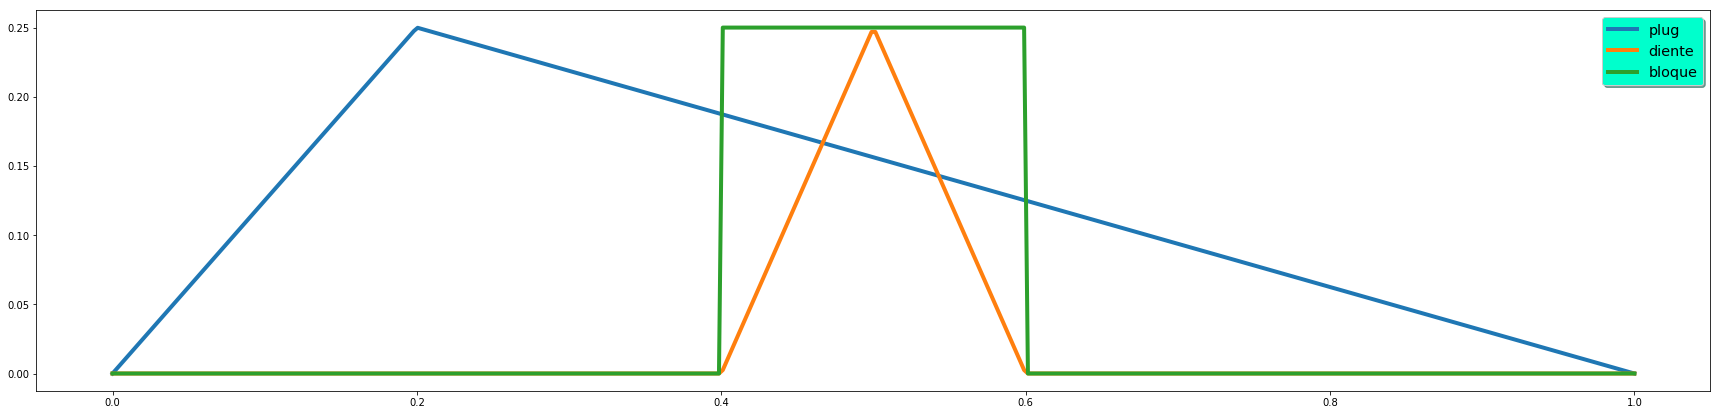

In [6]:
fig = plt.figure(figsize=(30,7))
ax = fig.add_subplot(111)
ax.plot(x,plug, lw = 4, label='plug')
ax.plot(x,diente, lw = 4, label='diente')
ax.plot(x,bloque, lw = 4, label='bloque')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
plt.show()

In [7]:
f, g = cero, plug

In [8]:
#Los $b_n$ y $d_n$ se calculan por integración numérica
nn = np.array(range(1,N+1))
n = nn.reshape((N,1))
y = np.sin(n*x*np.pi/l) 
b = (2/l)*integrate.simps(y*f, x)
b = b.reshape((N,1))
dd = (2/l*np.pi*c)*integrate.simps(y*g, x) 
d  = dd.reshape((N,1))*1/n 
x_part1, x_part2 = b*y, d*y

In [9]:
def perfil(t):
    return np.sum(np.cos((c/l)*np.pi*t*n)*x_part1, axis = 0)  + (
        np.sum(np.sin((c/l)*np.pi*t*n)*x_part2, axis = 0)) 

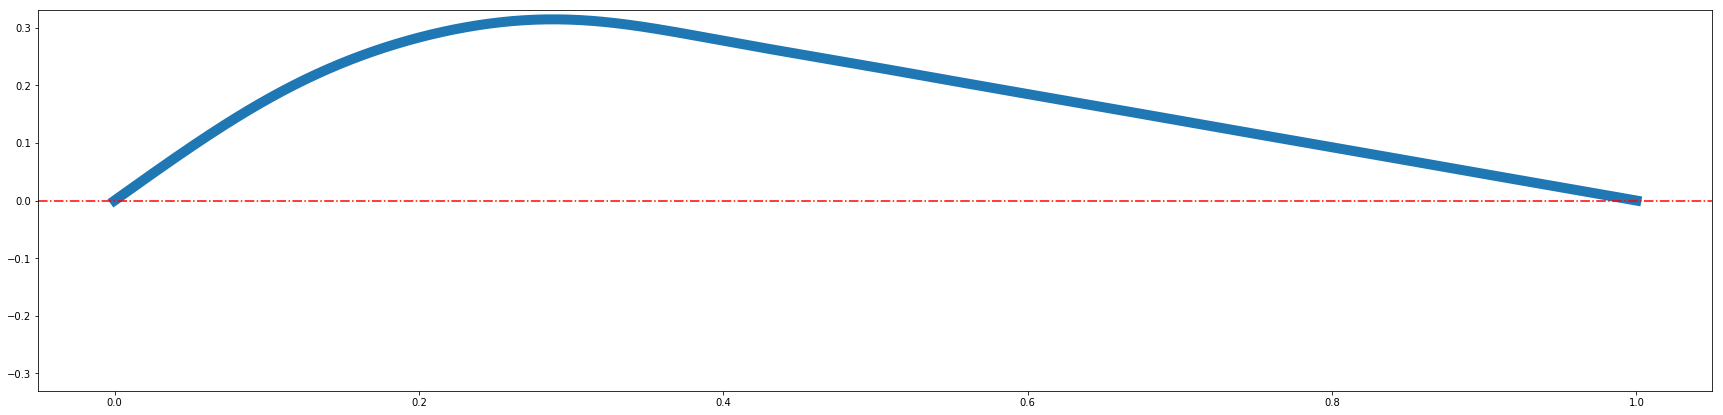

In [10]:
prof = perfil(0.15)
f_ampl = np.max(abs(prof))
fig = plt.figure(figsize=(30,7))
ax = fig.add_subplot(111)
ax.plot(x,prof, lw = 10)
plt.axhline(y=0.0, color='r', linestyle='-.')
ax.set_ylim([-f_ampl*1.05, f_ampl*1.05])
plt.show()

## Animación

(-0.625, 0.625)

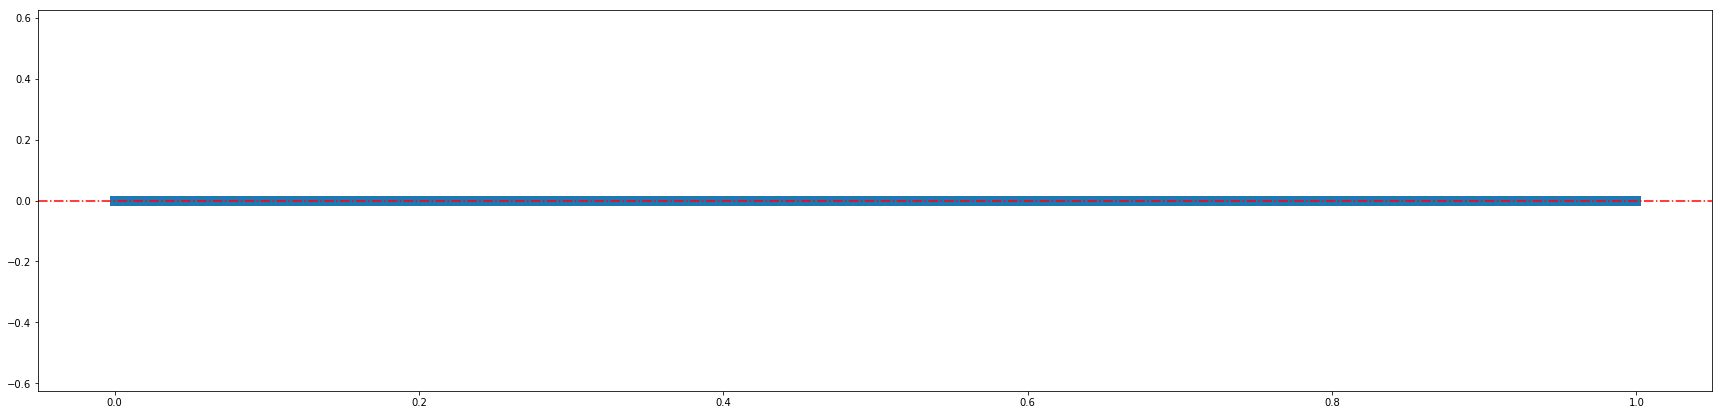

In [29]:
fig = plt.figure(figsize=(30,7))
ax = fig.add_subplot(111)
line, = ax.plot(x, f, lw =10)
ax.axhline(y=0.0, color='r', linestyle='-.')
ax.set_ylim([-ampl*2.5, ampl*2.5])


In [30]:
def animacion(i):
    line.set_ydata(perfil(i/100))  # update the data
    return line,

In [31]:
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

In [33]:
ani = animation.FuncAnimation(fig, animacion, np.arange(1, 300), init_func=init,
                              interval=50, blit=True)
ani.save('onda.mp4', metadata={'artist':'Socarronte'})

plt.show()